# Example 3.10.1

In this example we are trying to implement a simple sequential model in Keras.





### Loading the XOR dataset ###

In [9]:
import numpy as np

class Data:
    def __init__(self, N, sigma):
        self.N=N #Number of data per cluster.
        self.sigma=sigma #standard deviation of the clusters.

    def data_xor(self, classes):
        X=self.sigma*np.random.randn(2,4*self.N) # Generate 4*N random vectors (gaussian) centered around zero
        mean=np.array([[-1,-1, 1, 1],[-1,1,-1,1]]) # define four means
        M=np.ones((self.N,2))*mean[:,0] # Means of the first cluster
        y=np.ones((1,self.N))*classes[0] # Labels of the first cluster
        for i in range(1,4):
            m=np.ones((self.N,2))*mean[:,i] # Means of cluster i
            M=np.concatenate((M,m))     #Concatenate all means
            y=np.concatenate((y,np.ones((1,self.N))*classes[i]),axis=1) # concatenate labels
        M=M.T
        X=X+M # Add means to the data.
        return X,y

#The class definition ends here.

### Define variables and generate XOR data using the `Data` function

In [10]:


np.random.seed(30) #allows to reproduce the same results.
N=100; sigma=0.6 #attributes for xor.
classes=[0,1,1,0] #attribute for xor.
T=Data(N,sigma) #define the object corresponding to xor data.
X,y=T.data_xor(classes) #method with instance variable classes.
X=np.transpose(X)
y=np.transpose(y)
y=np.ravel(y)
print(y.shape)
print(X.shape)

(400,)
(400, 2)


### Splitting the data into training and test set ###

In [11]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(320, 2) (80, 2)


### Defining the sequential model with dense layers ###

In [12]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=4)

c:\envs\Deepbook\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5485 - loss: 0.6791 - val_accuracy: 0.7250 - val_loss: 0.6323
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.8476 - loss: 0.5953 - val_accuracy: 0.8000 - val_loss: 0.5609
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.9218 - loss: 0.5106 - val_accuracy: 0.8125 - val_loss: 0.5047
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.9270 - loss: 0.4584 - val_accuracy: 0.8500 - val_loss: 0.4572
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.9167 - loss: 0.4104 - val_accuracy: 0.8500 - val_loss: 0.4171
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.8940 - loss: 0.3828 - val_accuracy: 0.8625 - val_loss: 0.3854
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.9044 - loss: 0.3732 - val_accuracy: 0.8375 - val_loss: 0.3633
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.9198 - loss: 0.3225 - val_accura

### Plotting the test and validation accuracy ###

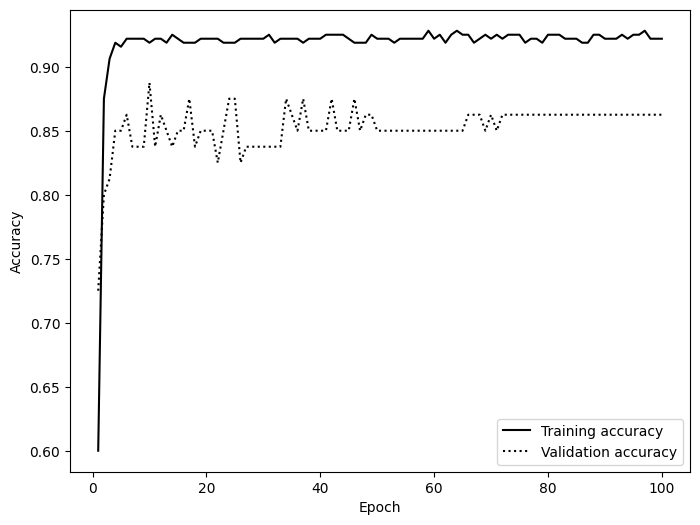

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,6))
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'k-', label='Training accuracy')
plt.plot(epochs, val, 'k:', label='Validation accuracy')
#plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Data/accuracy_curve.pdf')

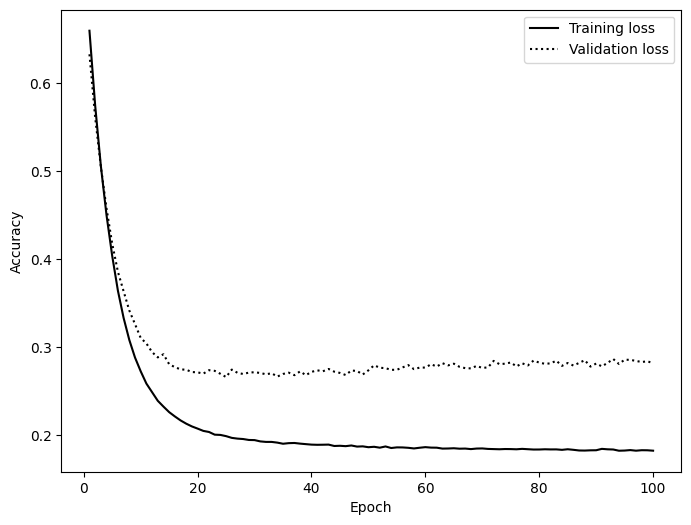

In [14]:
#sns.set()
fig, ax = plt.subplots(figsize=(8,6))
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'k-', label='Training loss')
plt.plot(epochs, val_loss, 'k:', label='Validation loss')
#plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

fig.savefig('Data/loss_curve.pdf')

### Evaluating the test accuracy ###

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8727 - loss: 0.2698 
Test accuracy: 0.862500011920929


### Plotting the confusion matrix ###

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


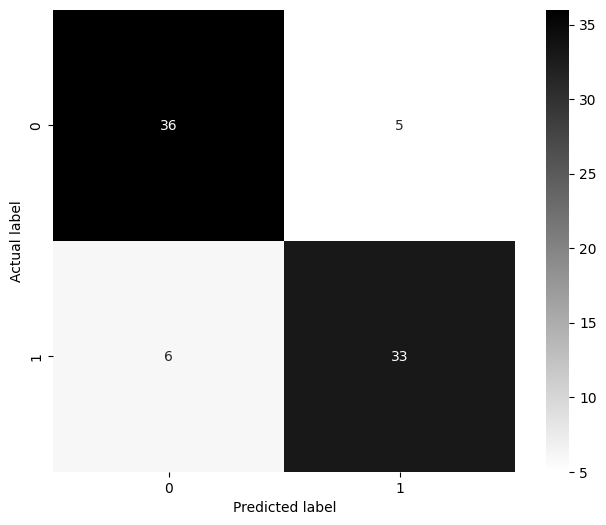

In [16]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['0', '1']
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, #cmap='Blues',
            xticklabels=labels, yticklabels=labels, cmap='binary')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
fig.savefig('Data/conf_matrix.pdf')